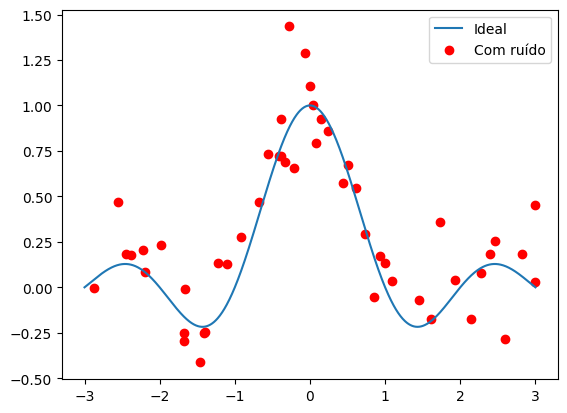

In [64]:
import numpy as np
import matplotlib.pyplot as plt

m=50
sigma=0.2

# Gerando pontos aleatórios e adicionando ruído gaussiano
X = np.random.uniform(-3, 3, size=(m, 1))
y = np.sinc(X).ravel() + np.random.normal(scale=sigma, size=X.shape[0])

# Plotando gráfico ideal do sinc e dos pontos com ruído
x_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_plot = np.sinc(x_plot).ravel()
plt.plot(x_plot, y_plot, label='Ideal')
plt.scatter(X, y, color='red', label='Com ruído')
plt.legend()
plt.show()


0.002
0.0006666666666666666
0.0003999999999999999
0.0002857142857142857


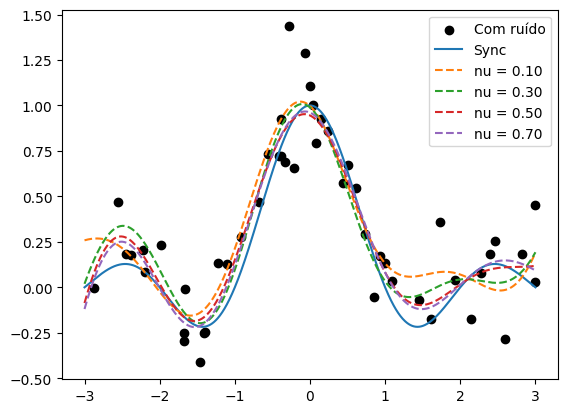

In [65]:
from sklearn.svm import NuSVR

C=100
nus=np.arange(0.1, 0.9, 0.2)
kernel='rbf'

plt.scatter(X, y, color='black', label='Com ruído')
plt.plot(x_plot, y_plot, label='Sync')

for nu in nus:
    model = NuSVR(C=C, nu=nu, kernel=kernel)
    model.fit(X, y)

    y_predict = model.predict(x_plot)
    plt.plot(x_plot, y_predict, '--',label='nu = {:.2f}'.format(nu))
    
    epsilon = (1 / (m * C)) / nu

    print(epsilon)

plt.legend()
plt.show()



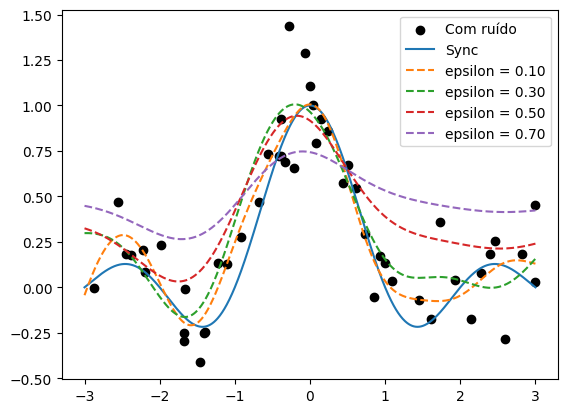

In [66]:
from sklearn.svm import SVR

C=100
epsilons=np.arange(0.1, 0.9, 0.2)
kernel='rbf'

plt.scatter(X, y, color='black', label='Com ruído')
plt.plot(x_plot, y_plot, label='Sync')

for epsilon in epsilons:
    model = SVR(kernel=kernel, C=C, gamma='auto', epsilon=epsilon)
    model.fit(X, y)

    y_predict = model.predict(x_plot)
    plt.plot(x_plot, y_predict, '--',label='epsilon = {:.2f}'.format(epsilon))

plt.legend()
plt.show()

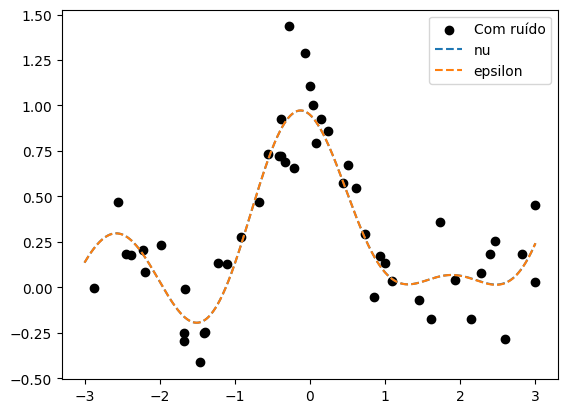

mse_nusvr:  0.015182415367913482
mse_svr:  0.015174970140861001
diff:  7.445227052481004e-06


In [73]:
from sklearn.svm import SVR, NuSVR
import numpy as np
from sklearn.metrics import mean_squared_error

# Parâmetros do NuSVR
C = 100
nu = 0.2
epsilon = 0.22
kernel = 'rbf'

# Treinando um NuSVR
model_nusvr = NuSVR(C=C, nu=nu, kernel=kernel)
model_nusvr.fit(X, y)
y_predict_nu = model_nusvr.predict(x_plot)


# Treinando um SVR com o mesmo valor de epsilon
model_svr = SVR(C=C, kernel=kernel, epsilon=epsilon)
model_svr.fit(X, y)
y_predict = model_svr.predict(x_plot)

plt.scatter(X, y, color='black', label='Com ruído')
plt.plot(x_plot, y_predict_nu, '--',label='nu')
plt.plot(x_plot, y_predict, '--',label='epsilon')
plt.legend()
plt.show()


mse_nusvr = mean_squared_error(y_plot, y_predict_nu)
mse_svr = mean_squared_error(y_plot, y_predict)
print("mse_nusvr: ", mse_nusvr)
print("mse_svr: ", mse_svr)
print("diff: ", abs(mse_svr-mse_nusvr))

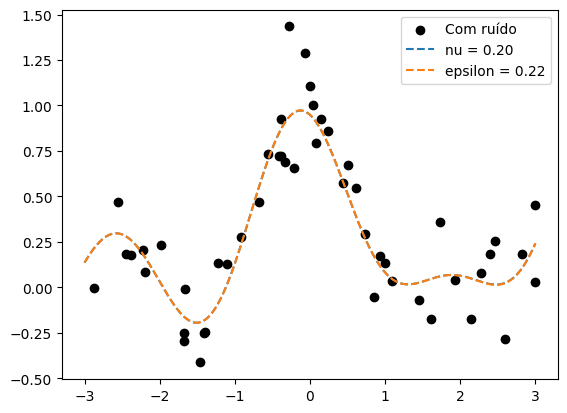

In [75]:
from sklearn.svm import SVR, NuSVR
import numpy as np
from sklearn.metrics import mean_squared_error

# Parâmetros do NuSVR
C = 100
nu = 0.2
kernel = 'rbf'
tol = 1e-5

# Treinando um NuSVR
model_nusvr = NuSVR(C=C, nu=nu, kernel=kernel)
model_nusvr.fit(X, y)
y_predict_nu = model_nusvr.predict(x_plot)

mse_nusvr = mean_squared_error(y_plot, y_predict_nu)

best_epsilon = 0
for epsilon in np.arange(0.01, 0.9, 0.01):

    # Treinando um SVR com o mesmo valor de epsilon
    model_svr = SVR(C=C, kernel=kernel, epsilon=epsilon)
    model_svr.fit(X, y)
    y_predict = model_svr.predict(x_plot)
    mse_svr = mean_squared_error(y_plot, y_predict)

    if abs(mse_svr - mse_nusvr) < tol:
        best_epsilon = epsilon
        break


plt.scatter(X, y, color='black', label='Com ruído')
plt.plot(x_plot, y_predict_nu, '--',label='nu = {:.2f}'.format(nu))
plt.plot(x_plot, y_predict, '--',label='epsilon = {:.2f}'.format(best_epsilon))
plt.legend()
plt.show()


